## MG-GY 8401: Programming for Business Intelligence and Analytics
### Lecture 4

We will take a look at some components of the `matplotlib` package

1. Figures
1. Axes 

and the `pandas` package

1. Loading Files
1. Accessing Entries

Note that Python has several versions. We will be using **Python 3.7**.

In [4]:
# import some packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# change some settings

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 8)

plt.rcParams['figure.figsize'] = (10,8)

In [2]:
my_array = np.array([1,2,3]).astype("int16")

In [3]:
my_array.dtype

dtype('int16')

### Loading the Data

We have data about stock prices of Apple (AAPL) and Amazon (AMZN). The data gave the daily stock price at the close of the market between January 1, 2010 and December 31, 2017. 

If $P_{i+1}$ and $P_i$ are the stock prices on day $i + 1$ and day $i$, then we can calculate the rate of return of the stock price on day $i$. Formatting as a percentage, we have

$$100 * \displaystyle\frac{P_{i+1} - P_i}{P_i}$$

For each month, we can average the rate of return formatted as a percentage. The data for AAPL is contained in the file `AAPL.csv`. 


In [5]:
aapl = pd.read_csv("AAPL.csv")
aapl

,year,month,returns
0,2010,1,-0.596477
1,2010,2,0.323103
2,2010,3,0.593624
3,2010,4,0.483723
4,2010,5,-0.120647
...,...,...,...
91,2017,8,0.430815
92,2017,9,-0.316260
93,2017,10,0.412639
94,2017,11,0.088907


The `pandas` function `read_csv` allows us to load the data from the file. Note that we have a comma-separated-value format.

In [ ]:
my_dataframe = pd.DataFrame{[]}

In [7]:
amzn = pd.read_csv("AMZN.csv")
amzn

,year,month,returns
0,2010,1,-0.361860
1,2010,2,-0.318405
2,2010,3,0.578905
3,2010,4,0.017714
4,2010,5,-0.475961
...,...,...,...
91,2017,8,-0.037178
92,2017,9,-0.104010
93,2017,10,0.597536
94,2017,11,0.291789


The data for AMZN is contained in the file `AMZN.csv`. 

### Plot the Data

We can access the data in the `returns` column with brackets. We obtain a `pandas` Series. 

In [8]:
amzn["returns"]

0    -0.361860
1    -0.318405
2     0.578905
3     0.017714
4    -0.475961
        ...   
91   -0.037178
92   -0.104010
93    0.597536
94    0.291789
95   -0.034963
Name: returns, Length: 96, dtype: float64

If we use two pairs of brackets then we obtain a `pandas` DataFrame. 

In [9]:
amzn[["returns"]]

,returns
0,-0.361860
1,-0.318405
2,0.578905
3,0.017714
4,-0.475961
...,...
91,-0.037178
92,-0.104010
93,0.597536
94,0.291789


Using the function `plot`, we can generate a chart.

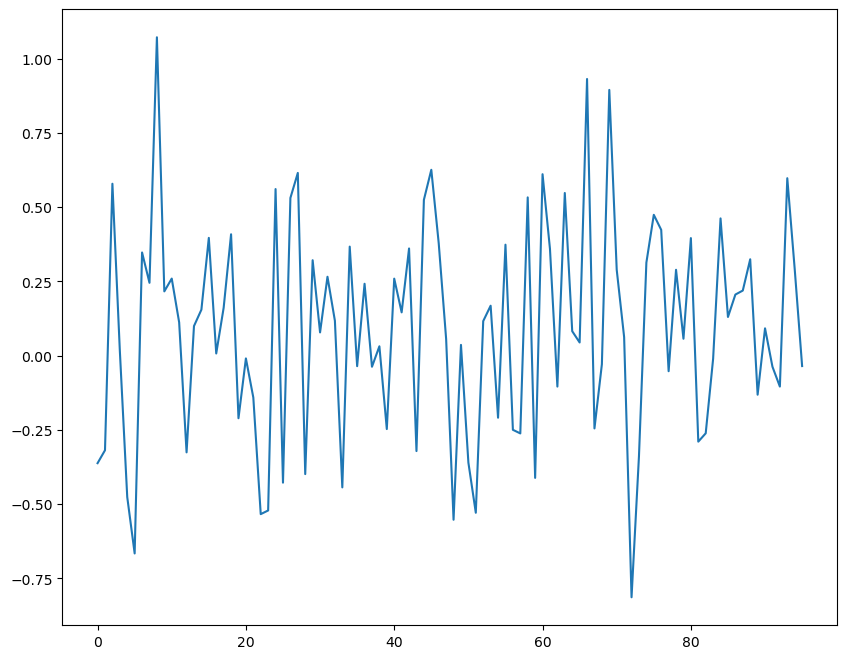

In [10]:
amzn["returns"].plot();

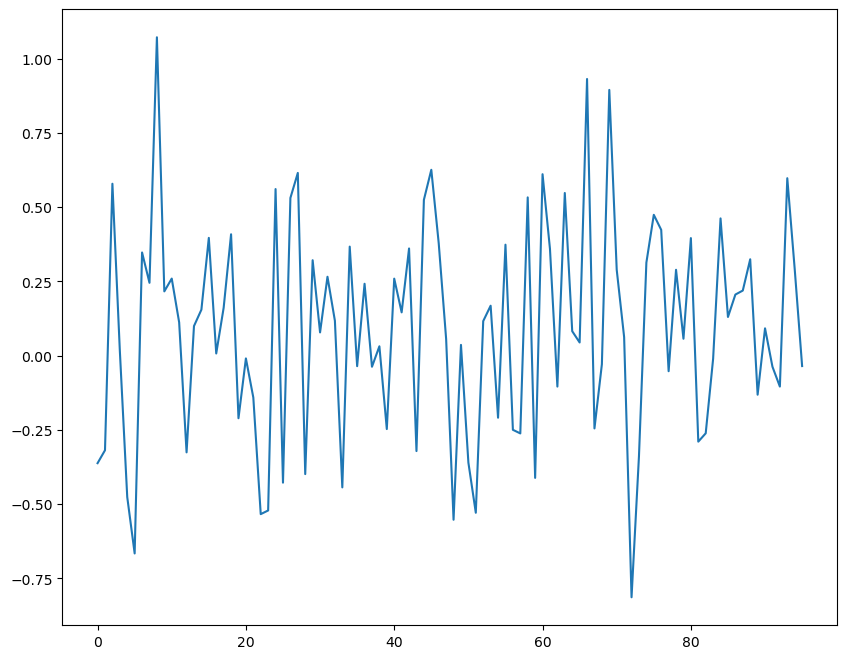

In [11]:
my_plot = amzn["returns"].plot()

Note that the `plot` function has many arguments.

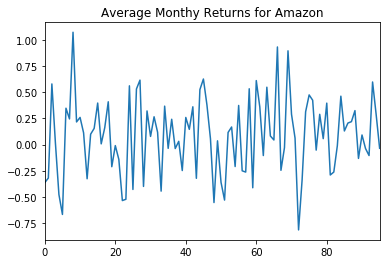

In [6]:
amzn["returns"].plot(title = "Average Monthy Returns for Amazon");

However, if we want to modify many aspects of the figure and axes, then we should work with `matplotlib`.

### Axes

We can use the `plot` function to generate a line-chart with the returns.

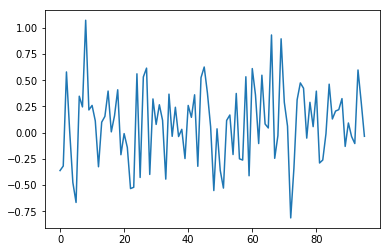

In [7]:
plt.plot(amzn["returns"]);

Note that the semicolon suppresses the output of the `plot` function. Sometimes we want to access the configuration of the figure and axes.

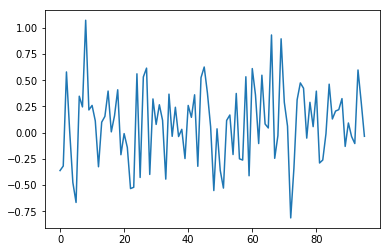

In [8]:
chart_information = plt.plot(amzn["returns"])

If we store the output of the `plot` function with a variable, then we can access the configuration. 

#### Line Style

We can adjust the 

- shape
- color 
- style 

of the line

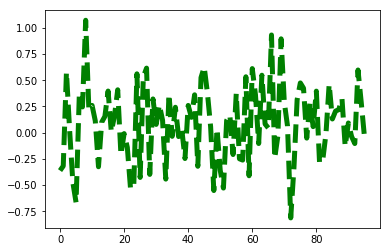

In [9]:
plt.plot(amzn["returns"], linewidth = 5, linestyle = "--", color = "green");

#### Annotations

We can add text and arrows to the chart for more information.

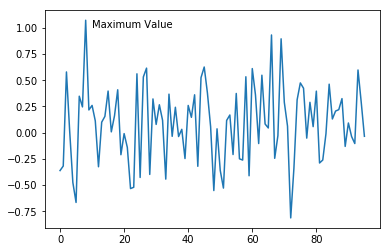

In [10]:
plt.plot(amzn["returns"])

plt.text(10,1,"Maximum Value");

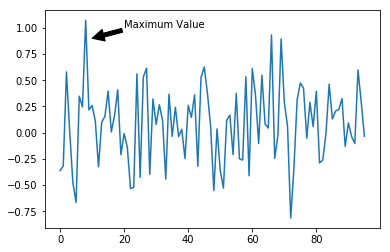

In [11]:
plt.plot(amzn["returns"])

plt.annotate('Maximum Value', xy=(10,0.9), xytext=(20,1), arrowprops={"facecolor" : "black"});

#### Tick Marks

While `matplotlib` will automatically provide tick marks, we might need to change the location or labels depending on the data.

We can access the different years with the `numpy` function `unique`.

In [7]:
years = np.unique(amzn["year"])
years

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

Note that we have 8 years. Since each year has 12 months, we have 96 points.

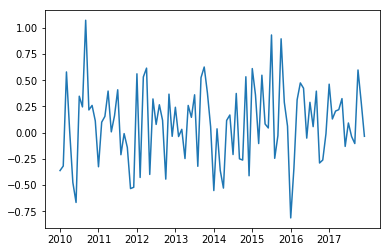

In [13]:
plt.plot(amzn["returns"])

plt.xticks(ticks = np.arange(0, 96, 12), labels = years);

Note that we used the `numpy` function `arange` to determine an array of numbers between 0 and 96 (exclusive) differing by increments of 12.

### Figure

The figure contains information that helps us to understand the axes. If we include labels, then viewers should not need to access the table for reference.

#### Axis Labels

We can label the horizontal axis with the function `xlabel`.

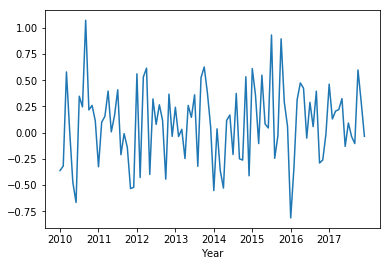

In [8]:
plt.plot(amzn["returns"])

plt.xticks(ticks = np.arange(0, 96, 12), labels = years)

plt.xlabel("Year");

We can label the vertical axis with the function `ylabel`.

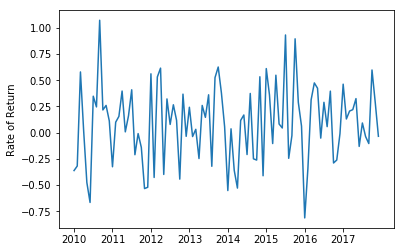

In [9]:
plt.plot(amzn["returns"])

plt.xticks(ticks = np.arange(0, 96, 12), labels = years)

plt.ylabel("Rate of Return");

#### Legend

If we label the graphics in the axes, then we can generate a legend in the figure.

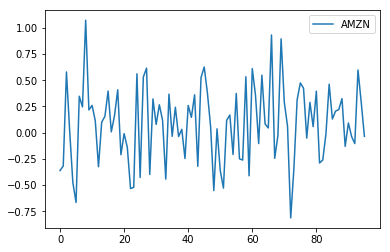

In [10]:
plt.plot(amzn["returns"], label = "AMZN")

plt.legend();

Note that we can adjust the location of the legend with the argument `loc`.

#### Title

We can add a title with the function `title`.

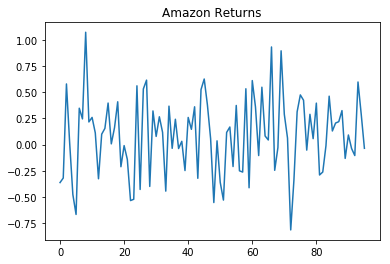

In [11]:
plt.plot(amzn["returns"], label = "AMZN")

plt.title("Amazon Returns");

#### Multiple Charts

We have different approaches to combining charts. We could plot multiple line-charts in the same axis. 

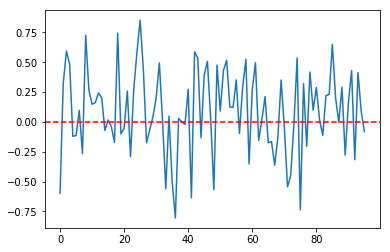

In [12]:
plt.plot(aapl["returns"])

plt.axhline(y = 0, color = "red", linestyle = "--");

Here the function `axhline` gives a horizontal line spanning the axis.

Alternatively, we can have multiple axes in a figure.

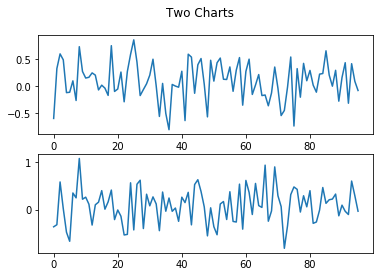

In [13]:
fig, axes = plt.subplots(2,1)

axes[0].plot(aapl["returns"])

axes[1].plot(amzn["returns"])

fig.suptitle("Two Charts");

#### Exporting Images

We have two types of image formats

- vector 
- raster 

Raster images contain pixels arranged in a grid. The format tends to generate smaller files. Vector images contain combinations of shapes. The format tends to give better resolution. 

We use the function `savefig` to export a chart to a file.

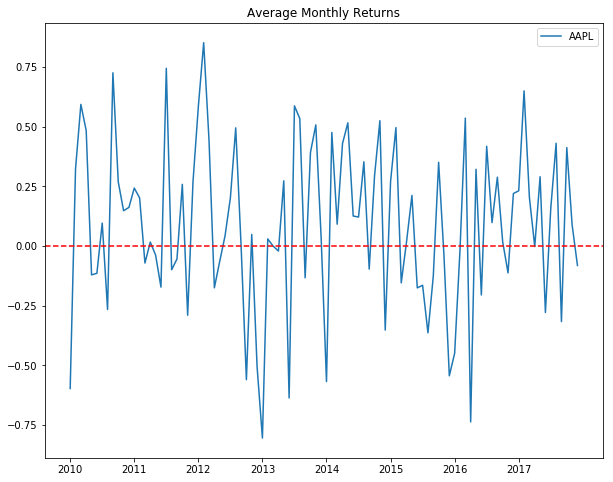

In [77]:
plt.plot(aapl["returns"])

plt.savefig("AAPL.svg");

The SVG format is common for vector images. You can use a web-browser to the view the files. In the web-browser you can pan and zoom. 

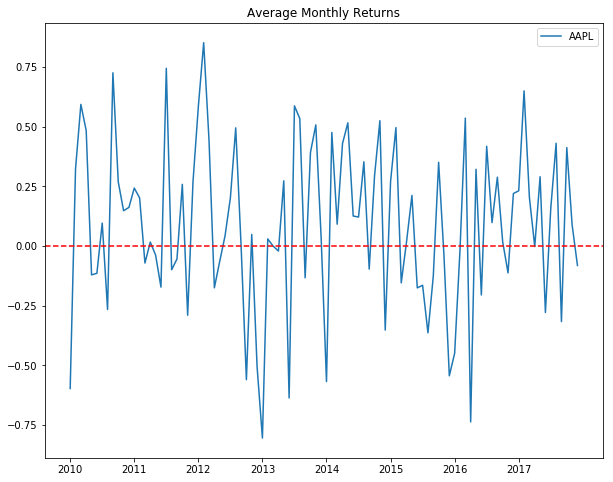

In [77]:
plt.plot(aapl["returns"])

plt.savefig("AAPL.png");

The PNG format is common for raster images. 

#### Modifying Defaults 

After we import the `matplotlib` package, we can configure the settings.

In [ ]:
plt.rcParams['figure.figsize'] = (10,8)

For example, we can change the default size of the figure to `(10,8)`. The change will apply to all figures. 

We have several magic commands about `matplotlib`. The command

> `%matplotlib` 

will cause charts to open in separate windows. The command

> `%matplotlib inline`

will lead to static images of your plot embedded in the notebook. The command

> `%matplotlib notebook`

will lead to interactive plots embedded within the notebook. We tend to use the default of `inline`.

### Support and Resistance

We can use `matplotlib` and `pandas` to generate charts for AAPL. We can get a better understanding of the pattern with moving averages. Here we can take a three month moving average. For month $i$, we replace the rate of return  $\text{Month}_i$ with the average rate of return over three months

$$\frac{1}{3} \left(\text{Month}_i + \text{Month}_{i-1} + \text{Month}_{i-2} \right)$$

We can plot three possible trend lines for the support.

<img src="support.PNG"  width="600"/>

We can plot three possible trend lines for the resistance.

<img src="resistance.PNG"  width="600"/>


Which trend lines seem to be appropriate levels?

